<a href="https://colab.research.google.com/github/viditshahu/Pizza_Sales_Performance_Analysis/blob/main/Pizza_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
order_details = pd.read_csv('/content/drive/MyDrive/order_details.csv')

In [ ]:
orders = pd.read_csv('/content/drive/MyDrive/orders_with_customer_age.csv')

In [ ]:
pizzas = pd.read_csv('/content/drive/MyDrive/pizzas.csv')

In [ ]:
pizza_types = pd.read_csv('/content/drive/MyDrive/pizza_types.csv')

Handle NULL values

In [ ]:
orders.dropna(inplace=True)
order_details.dropna(inplace=True)
pizzas.dropna(inplace=True)
pizza_types.dropna(inplace=True)

Remove duplicates

In [ ]:
orders.drop_duplicates(inplace=True)
order_details.drop_duplicates(inplace=True)
pizzas.drop_duplicates(inplace=True)
pizza_types.drop_duplicates(inplace=True)

Correct datatypes

In [ ]:
orders["date"] = pd.to_datetime(orders["date"])
orders["time"] = pd.to_datetime(orders["time"]).dt.time
order_details["quantity"] = order_details["quantity"].astype(int)
pizzas["price"] = pizzas["price"].astype(float)

/tmp/ipython-input-781670550.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders["time"] = pd.to_datetime(orders["time"]).dt.time


In [ ]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     21350 non-null  int64 
 1   date         21350 non-null  object
 2   time         21350 non-null  object
 3   customer_id  21350 non-null  object
 4   age          21350 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 834.1+ KB


In [ ]:
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [ ]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


Merging all the tables

In [ ]:
df = (
    order_details
    .merge(orders, on="order_id", how="inner")
    .merge(pizzas, on="pizza_id", how="inner")
    .merge(pizza_types, on="pizza_type_id", how="inner")
)

In [ ]:
df

,order_details_id,order_id,pizza_id,quantity,date,time,customer_id,age,pizza_type_id,size,price,name,category,ingredients,revenue,age_group
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,CUST4145,28,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,19-35
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,CUST7749,25,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,19-35
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,CUST7749,25,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,19-35
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,CUST7749,25,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,19-35
4,5,2,mexicana_m,1,2015-01-01,11:57:40,CUST7749,25,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,19-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,CUST3859,67,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",16.75,51+
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,CUST3859,67,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",17.95,51+
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,CUST3859,67,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",12.00,51+
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,CUST3911,43,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",20.25,36-50


OUTLIER DETECTION (IQR)


In [ ]:
Q1 = df["revenue"].quantile(0.25)
Q3 = df["revenue"].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df[
    (df["revenue"] < Q1 - 1.5 * IQR) |
    (df["revenue"] > Q3 + 1.5 * IQR)
]

In [ ]:
df_outliers

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,revenue
183,184,78,spicy_ital_l,3,2015-01-02,12:28:14,spicy_ital,L,20.75,The Spicy Italian Pizza,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",62.25
211,212,91,bbq_ckn_l,2,2015-01-02,15:14:43,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",41.50
341,342,144,bbq_ckn_m,3,2015-01-03,13:44:28,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",50.25
456,457,193,ckn_alfredo_l,2,2015-01-03,20:55:47,ckn_alfredo,L,20.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",41.50
611,612,271,cali_ckn_m,2,2015-01-05,14:22:19,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",33.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48396,48397,21251,four_cheese_l,2,2015-12-30,12:45:20,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",35.90
48417,48418,21260,prsc_argla_m,2,2015-12-30,15:45:32,prsc_argla,M,16.50,The Prosciutto and Arugula Pizza,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",33.00
48466,48467,21288,classic_dlx_m,3,2015-12-31,13:04:18,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",48.00
48575,48576,21331,bbq_ckn_l,2,2015-12-31,19:05:04,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",41.50


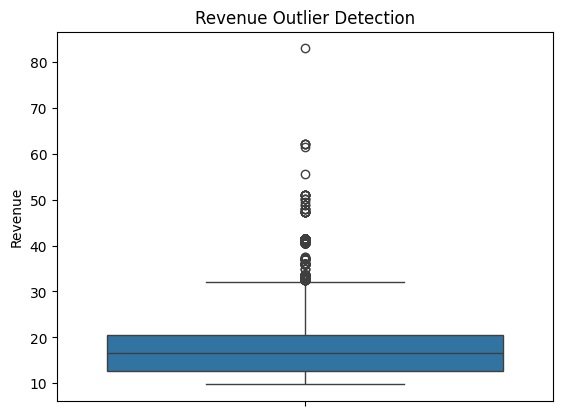

In [ ]:
plt.figure()
sns.boxplot(y=df["revenue"])
plt.title("Revenue Outlier Detection")
plt.ylabel("Revenue")
plt.show()

KPI CALCULATIONS

Cumulative revenue over time

In [ ]:
df['revenue'] = df['quantity'] * df['price']
daily_revenue = df.groupby('date')['revenue'].sum().reset_index()
daily_revenue['cumulative_revenue'] = daily_revenue['revenue'].cumsum()
daily_revenue['cumulative_revenue']

,cumulative_revenue
0,2713.85
1,5445.75
2,8108.15
3,9863.60
4,11929.55
...,...
353,810615.80
354,812253.00
355,813606.25
356,814944.05


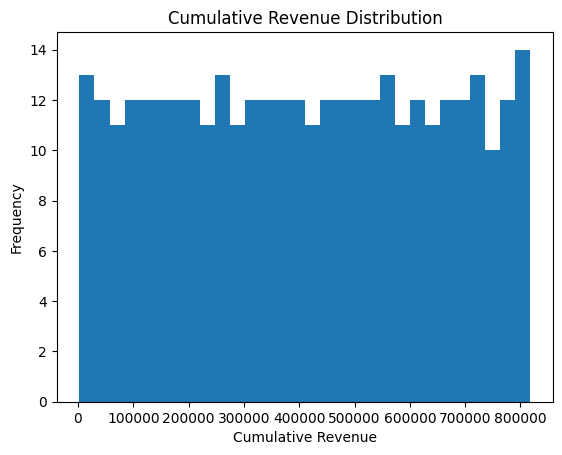

In [ ]:
# Histogram – Cumulative Revenue
plt.figure()
plt.hist(daily_revenue["cumulative_revenue"], bins=30)
plt.xlabel("Cumulative Revenue")
plt.ylabel("Frequency")
plt.title("Cumulative Revenue Distribution")
plt.show()


 Most selling pizza categories

In [ ]:
category_sales = df.groupby("category")["quantity"].sum().reset_index()
category_sales

,category,quantity
0,Chicken,11050
1,Classic,14888
2,Supreme,11987
3,Veggie,11649


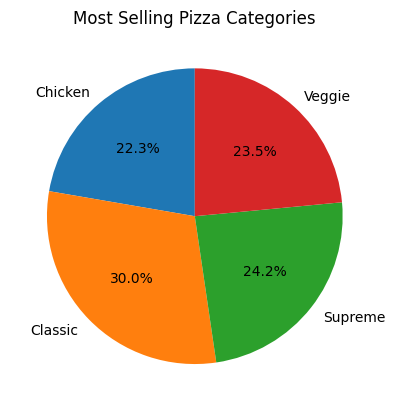

In [ ]:
# Pie Chart – Most Selling Pizza Categories (Seaborn)
plt.figure()
plt.pie(
    category_sales["quantity"],
    labels=category_sales["category"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Most Selling Pizza Categories")
plt.show()

Correlation

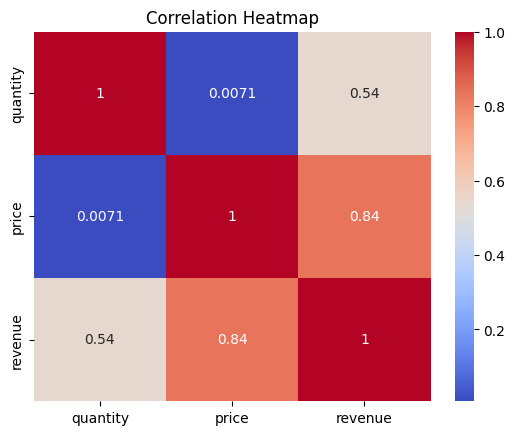

In [ ]:
# Heatmap – Correlation
plt.figure()
corr = df[["quantity", "price", "revenue"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Repeat buyers order frequency

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df_customers = df.groupby(['customer_id','month'],as_index=False)['order_id'].count().rename(columns={'order_id':'orders_counts'})
df_repeat_customers = df_customers[df_customers['orders_counts']>=1]
print(df_repeat_customers)

      customer_id  month  orders_counts
0        CUST0001      1              2
1        CUST0001      3              1
2        CUST0001      8              4
3        CUST0002     11              2
4        CUST0003      6              1
...           ...    ...            ...
19512    CUST9725      4              4
19513    CUST9725      7              1
19514    CUST9725      8              3
19515    CUST9726      1              4
19516    CUST9726      8              1

[19517 rows x 3 columns]


In [ ]:
df_repeat_count = df_repeat_customers.groupby('customer_id',as_index=False)['month'].count().sort_values(by='month',ascending=False)
df_repeat_count = df_repeat_count[df_repeat_count['month'] == 6]
print(df_repeat_count)

     customer_id  month
398     CUST0452      6
3006    CUST3394      6
7176    CUST8063      6
7310    CUST8214      6
2767    CUST3119      6
...          ...    ...
5989    CUST6735      6
4600    CUST5200      6
1445    CUST1634      6
8040    CUST9045      6
5413    CUST6110      6

[61 rows x 2 columns]


Identified 61 repeat buyers based on order frequency of each month

Discount review

In [ ]:
df['revenue'] = df['quantity'] * df['price']

In [ ]:
low_pizza_revenue = df.groupby('name',as_index=False)['revenue'].sum().sort_values(by='revenue').head(5)
print(low_pizza_revenue)

                         name   revenue
2        The Brie Carre Pizza  11588.50
11     The Green Garden Pizza  13955.75
28  The Spinach Supreme Pizza  15277.75
16    The Mediterranean Pizza  15360.50
27    The Spinach Pesto Pizza  15596.00


In [ ]:
pizza_price = df.groupby('name',as_index=False)['price'].max().sort_values(by='price',ascending=False).head(5)
print(pizza_price)

                            name  price
10               The Greek Pizza  35.95
2           The Brie Carre Pizza  23.65
15  The Italian Vegetables Pizza  21.00
0     The Barbecue Chicken Pizza  20.75
6        The Chicken Pesto Pizza  20.75


A discount can be given on the Brie Carre Pizza, as it has the lowest revenue contribution but the highest price.

High revenue age group

In [ ]:
import numpy as np

conditions = [
    (df['age'] <= 18),
    (df['age'] > 18) & (df['age'] <= 35),
    (df['age'] > 35) & (df['age'] <= 50),
    (df['age'] > 50)
]

# Define corresponding labels
choices = ['0-18', '19-35', '36-50', '51+']

df['age_group'] = np.select(conditions, choices, default='Unknown')

In [ ]:
age_group_revenue = df.groupby('age_group',as_index=False)['revenue'].sum()
print(age_group_revenue)

  age_group    revenue
0      0-18   16791.95
1     19-35  269544.35
2     36-50  227929.55
3       51+  303594.20


In [ ]:
total_revenue = df['revenue'].sum()

In [ ]:
age_group_revenue['age_percent'] = age_group_revenue['revenue']*100/total_revenue
age_group_revenue = age_group_revenue.sort_values(by='age_percent',ascending=False)
print(age_group_revenue)

  age_group    revenue  age_percent
3       51+  303594.20    37.120556
1     19-35  269544.35    32.957271
2     36-50  227929.55    27.869016
0      0-18   16791.95     2.053157
